<a href="https://colab.research.google.com/github/KartikGondalia/CS6910_assignment1/blob/main/FeedForward_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1


## 1. Import Libraries

In [2]:
# !pip install tensorflow

In [3]:
# !pip install Keras

In [17]:
import tensorflow as tf

In [18]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt

In [19]:
from keras.datasets import fashion_mnist

In [20]:
import argparse

In [21]:
parser = argparse.ArgumentParser()
parser.add_argument('-wp' , '--wandb_project', help='Project name used to track experiments in Weights & Biases dashboard' , type=str, default='myprojectname')
parser.add_argument('-we', '--wandb_entity' , help='Wandb Entity used to track experiments in the Weights & Biases dashboard.' , type=str, default='myname')
parser.add_argument('-d', '--dataset', help='choices: ["mnist", "fashion_mnist"]', type=str, default='fashion_mnist')
parser.add_argument('-e', '--epochs', help="Number of epochs to train neural network.", type=int, default=1)
parser.add_argument('-b', '--batch_size', help="Batch size used to train neural network.", type=int, default=4)
parser.add_argument('-l','--loss', help = 'hoices: ["mean_squared_error", "cross_entropy"]' , type=str, default='cross_entropy')
parser.add_argument('-o', '--optimizer', help = 'choices: ["sgd", "momentum", "nag", "rmsprop", "adam", "nadam"]', type=str, default = 'sgd', required=True)
parser.add_argument('-lr', '--learning_rate', help = 'Learning rate used to optimize model parameters', type=float, default=0.1)
parser.add_argument('-m', '--momentum', help='Momentum used by momentum and nag optimizers.',type=float, default=0.5)
parser.add_argument('-beta', '--beta', help='Beta used by rmsprop optimizer',type=float, default=0.5)
parser.add_argument('-beta1', '--beta1', help='Beta1 used by adam and nadam optimizers.',type=float, default=0.5)
parser.add_argument('-beta2', '--beta2', help='Beta2 used by adam and nadam optimizers.',type=float, default=0.5)
parser.add_argument('-eps', '--epsilon', help='Epsilon used by optimizers.',type=float, default=0.000001)
parser.add_argument('-w_d', '--weight_decay', help='Weight decay used by optimizers.',type=float, default=.0)
parser.add_argument('-w_i', '--weight_init', help = 'choices: ["random", "Xavier"]', type=str, default='random')
parser.add_argument('-nhl', '--num_layers', help='Number of hidden layers used in feedforward neural network.',type=int, default=1)
parser.add_argument('-sz', '--hidden_size', help ='Number of hidden neurons in a feedforward layer.', nargs='+', type=int, default=4, required=False)
parser.add_argument('-a', '--activation', help='choices: ["identity", "sigmoid", "tanh", "ReLU"]', type=str, default='sigmoid')

_StoreAction(option_strings=['-a', '--activation'], dest='activation', nargs=None, const=None, default='sigmoid', type=<class 'str'>, choices=None, required=False, help='choices: ["identity", "sigmoid", "tanh", "ReLU"]', metavar=None)

## 2. Load the data

In [22]:
# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
df = fashion_mnist.load_data()

In [36]:
(x_train, y_train), (x_test, y_test) = df
number_of_example = x_train.shape[0]
x_train = x_train.astype('float64')
y_train = y_train.astype('float64')
x_test = x_test.astype('float64')
y_test = y_test.astype('float64')

x_train = x_train.reshape(number_of_example, 28*28)
y_train = y_train.reshape(y_train.shape[0], 1)

x_test = x_test.reshape(x_test.shape[0], 28*28)
y_test = y_test.reshape(y_test.shape[0], 1)

In [27]:
x_train.shape

(60000, 784)

In [39]:
y_train.shape

(60000, 1)

In [38]:
def one_hot_encoder(data):
    classes = np.unique(y_train)
    n_classes = classes.shape[0]
    zero_provider = np.zeros(n_classes)
    ret = np.zeros((data.shape[0], n_classes))
    _dictionary = {elm: id for id, elm in enumerate(classes)}
    for id, elm in enumerate(data):
        temp = zero_provider.copy()
        temp[_dictionary[elm[0]]] = 1
        ret[id] = temp
    
    return ret

y_train = one_hot_encoder(y_train)


array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

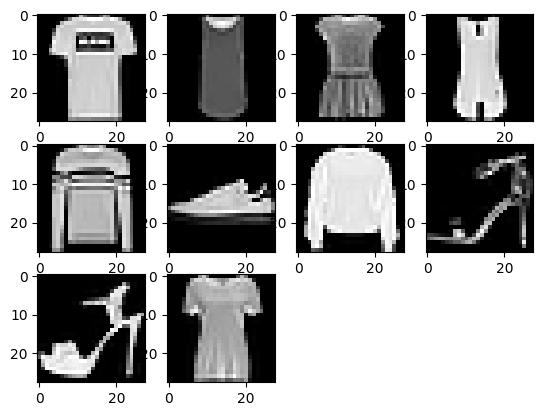

In [13]:

# for i in range(1, 11):
#     # Create a 3x3 grid and place the
#     # image in ith position of grid
#     plt.subplot(3, 4, i)
#     # Insert ith image with the color map 'grap'
#     plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
 
# # Display the entire plot
# plt.show()

## Question 2

In [16]:
class ffd:
    def __init__(self):
        self.num_of_layers = 0
    def relu(self,x):
        return (np.maximum(0,x))
    def softmax(self,x):
        return (np.exp(x)/np.exp(x).sum())
    def logloss(self,y,a):
        return -(y*np.log(a) + (1-y)*np.log(1-a))
    def init_params(self, inputs, neurons)
        self.W = np.random.randn(neurons, inputs)
        self.b = np.zeros(neurons, 1)

    def init(self, type="wb", mode = "random", printdims = False):
        if type == "wb" and mode == "random":
            self.init_random(printdims)
        elif type == "wb" and mode == "xavier":
            self.init_xavier(printdims)
        elif type=="grads":
            self.init_gradient(printdims)

    def init_random(self, printdims = False):
        self.params = {}
        for i in range(1, self.number_of_layers):
            self.params["W" + str(i)] = np.random.randn(self.layers[i], self.layers[i-1])*0.03
            self.params["b" + str(i)] = np.random.randn(self.layers[i], 1)
            if(printdims == True):
                print("W", {i}, " -> ", self.params["W" + str(i)])
                print("b", {i}, " -> ", self.params["b" + str(i)])
    
    def init_xavier(self, printdims = False):
        self.params = {}
        for i in range(1, self.number_of_layers):
            self.parameters["W" + str(i)] = np.random.randn(self.layers[i], self.layers[i - 1]) * np.sqrt(2/ (self.layers[i - 1] + self.layers[i]))
            self.parameters["b" + str(i)] = np.zeros((self.layers[i], 1))
            if(printdims == True):
                print("W", {i}, " -> ", self.params["W" + str(i)])
                print("b", {i}, " -> ", self.params["b" + str(i)])
    
    def init_gradient(self, printdims = False):
        dump = {}
        for i in range(1, self.num_of_layers):
            dump["Wg" + str(i)] = np.zeros((self.layers[i], self.layers[i - 1]))
            dump["bg" + str(i)] = np.zeros((self.layers[i], 1))
            if(printdims == True):
                print("Wg", {i}, " -> ", dump["Wg" + str(i)])
                print("bg", {i}, " -> ", dump["bg" + str(i)])
